In [1]:
# Let's classify IMBD movie reviews into positive and negative interviews using LSTMs in Keras.
# We are using Tensorflow 1.5 as backend, and Keras 2.1.3

In [2]:
import time
from keras.layers import LSTM, Embedding
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Bidirectional
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback

Using TensorFlow backend.


In [3]:
import keras
print(keras.__version__)

2.1.3


In [4]:
print('Loading data...')
max_words = 400
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words) # , skip_top=10)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [5]:
# monitor the loss, if the loss climbs instead of going down we stop the training
early_stopping=EarlyStopping(monitor='val_loss', patience=6)

In [6]:
print('Pad sequences (samples x time)')
maxlen = 400  # 400
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [7]:
batch_size = 124
epochs = 1  # let's train for only one epoch to save time

print('Build model...')
model = Sequential()
model.add(Embedding(max_words, 50))  # 1000
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# track time it took for each epoch
class TimeHistory(Callback):
    
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
        
time_callback = TimeHistory()

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    # validation_data=(x_test, y_test),
                    callbacks=[early_stopping, time_callback])

Train on 22500 samples, validate on 2500 samples
Epoch 1/1
22500/22500 [==============================] - 302s 13ms/step - loss: 0.5938 - acc: 0.6749 - val_loss: 0.5204 - val_acc: 0.7508


In [14]:
times = sum(time_callback.times)
print("All epochs took:", round(times/60, 2), "minutes")

All epochs took: 5.04 minutes


In [16]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 72s 3ms/step
Test score: 0.5084118087911605
Test accuracy: 0.7526400011825561


In [ ]:
# training a good LSTM model for just 1 epoch took a really long time, next we will see how we can make the training go faster.

In [17]:
# Now, let's use CNNs for this task
# the training time is considerably faster here

In [18]:
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Activation, SpatialDropout1D
from keras.layers import Conv1D, GlobalMaxPooling1D, PReLU, LeakyReLU
from keras.optimizers import SGD

batch_size = 64
epochs = 10

max_features = 5000
maxlen = 400  # 400
batch_size = 64
embedding_dims = 100
nb_filter = 250
filter_length = 3
hidden_dims = 50
nb_epoch = 4

model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(SpatialDropout1D(rate=0.6))

model.add(Conv1D(strides=1, kernel_size=5, filters=30, padding="valid"))
model.add(Dropout(0.4))
model.add(LeakyReLU())

model.add(Conv1D(strides=1, kernel_size=5, filters=30, padding="valid"))
model.add(Dropout(0.4))
model.add(LeakyReLU())

model.add(GlobalMaxPooling1D())

model.add(Dense(250))
model.add(Dropout(0.5))
model.add(LeakyReLU())

model.add(Dense(1))
model.add(Activation('sigmoid'))



In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              # optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),  # 'adam'
              metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    # validation_data=(x_test, y_test),
                    callbacks=[early_stopping, time_callback])

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 5s 213us/step - loss: 0.6326 - acc: 0.6074 - val_loss: 0.5253 - val_acc: 0.7692
Epoch 2/10
22500/22500 [==============================] - 4s 158us/step - loss: 0.4858 - acc: 0.7657 - val_loss: 0.4849 - val_acc: 0.7876
Epoch 3/10
22500/22500 [==============================] - 4s 164us/step - loss: 0.4533 - acc: 0.7874 - val_loss: 0.4593 - val_acc: 0.8016
Epoch 4/10
22500/22500 [==============================] - 3s 155us/step - loss: 0.4370 - acc: 0.7990 - val_loss: 0.4490 - val_acc: 0.8080
Epoch 5/10
22500/22500 [==============================] - 3s 154us/step - loss: 0.4296 - acc: 0.8005 - val_loss: 0.4443 - val_acc: 0.8136
Epoch 6/10
22500/22500 [==============================] - 3s 155us/step - loss: 0.4179 - acc: 0.8079 - val_loss: 0.4422 - val_acc: 0.8100
Epoch 7/10
22500/22500 [==============================] - 3s 155us/step - loss: 0.4142 - acc: 0.8111 - val_loss: 0.4293 - v

In [21]:
times = sum(time_callback.times)
print("All epochs took:", round(times/60, 2), "minutes")

All epochs took: 0.61 minutes


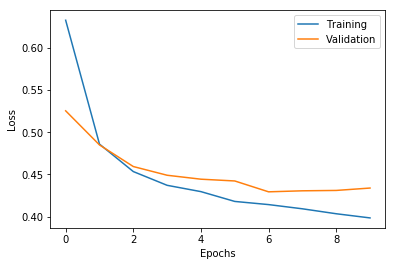

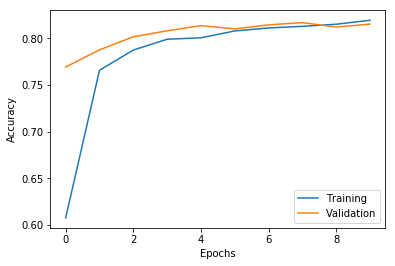

In [22]:
# inspect the model        
plot_history(history)

In [23]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 1s 39us/step
Test score: 0.4242110009765625
Test accuracy: 0.815680000038147


In [24]:
# Well, using CNNs yields good results, but can't we just speed up our LSTM somehow?
# Yes, we can use Keras' CUDA implementation of the LSTM called CuDNNLSTM, it is almost 10x faster on a GPU. 
# In this case, dropout only works in between layers. (For an advanced user: CuDNNLSTM does not support recurrent_dropout!)

In [25]:
batch_size = 124
epochs = 10

from keras.layers import CuDNNLSTM
print('Build model...')
model = Sequential()
model.add(Embedding(max_words, 50))
model.add(CuDNNLSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(100, stateful=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    # validation_data=(x_test, y_test),
                    callbacks=[early_stopping, time_callback])

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 22s 984us/step - loss: 0.5823 - acc: 0.6871 - val_loss: 0.5315 - val_acc: 0.7524
Epoch 2/10
22500/22500 [==============================] - 21s 928us/step - loss: 0.4323 - acc: 0.8074 - val_loss: 0.4402 - val_acc: 0.8000
Epoch 3/10
22500/22500 [==============================] - 21s 925us/step - loss: 0.4198 - acc: 0.8123 - val_loss: 0.4431 - val_acc: 0.8132
Epoch 4/10
22500/22500 [==============================] - 21s 927us/step - loss: 0.4056 - acc: 0.8211 - val_loss: 0.4353 - val_acc: 0.8224
Epoch 5/10
22500/22500 [==============================] - 21s 923us/step - loss: 0.4073 - acc: 0.8197 - val_loss: 0.4177 - val_acc: 0.8148
Epoch 6/10
22500/22500 [==============================] - 21s 921us/step - loss: 0.3871 - acc: 0.8284 - val_loss: 0.4371 - val_acc: 0.8264
Epoch 7/10
22500/22500 [==============================] - 21s 924us/step - loss: 0.3851 - acc: 0.8288 - val_loss: 0.4

In [28]:
times = sum(time_callback.times)
print("All epochs took:", round(times/60, 2), "minutes")

All epochs took: 3.49 minutes


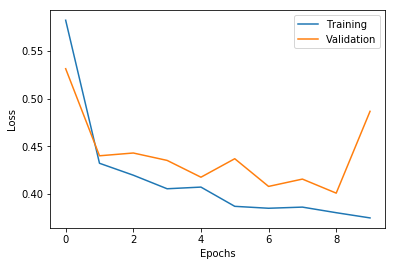

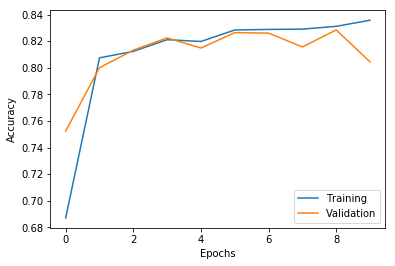

In [29]:
# inspect the model        
plot_history(history)

In [30]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 9s 379us/step
Test score: 0.4553125735807419
Test accuracy: 0.8136800014781952


In [ ]:
# CuDNNLSTM took 21s per epoch, while normal LSTM took around 5 minutes per epoch. Quite a speed up don't you think?

In [31]:
# Resources and References:
# http://www.samyzaf.com/ML/imdb/imdb.html
# https://medium.com/@thoszymkowiak/how-to-implement-sentiment-analysis-using-word-embedding-and-convolutional-neural-networks-on-keras-163197aef623